<a href="https://colab.research.google.com/github/sairaghunandanpulibandla/Artificial-Intelligence-Machine-Learning-Internship-YBI-Foundation/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from xgboost import XGBRegressor


%matplotlib inline

In [ ]:
d_train = pd.read_csv('../content/train.csv')
d_test = pd.read_csv('../content/test.csv')

In [ ]:
d_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# Printing the shape of train test data

print(d_train.shape, d_test.shape)

(1460, 81) (1459, 80)


In [ ]:
# Observing the data

d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Finding out the null values

d_train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
df= d_train.isna().sum().sum()# total missing values
df

6965

In [ ]:
len(d_train)/ df *100 # total missing values in percentages

20.96195262024408

<Axes: >

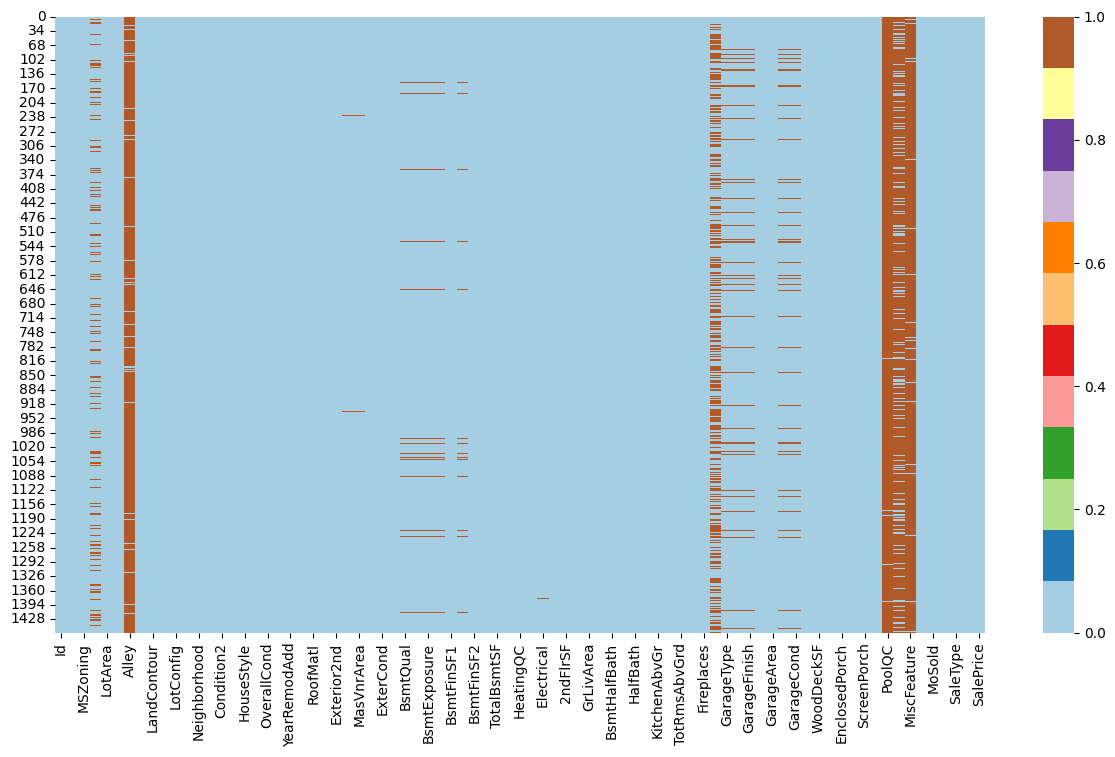

In [ ]:
# Visualizing missing values in a dataset

plt.figure(figsize=(15,8))
sns.heatmap(d_train.isna(),cmap='Paired')

In [ ]:
d_train['PoolQC']= d_train['PoolQC'].fillna('None')
d_train['MiscFeature']= d_train['MiscFeature'].fillna('None')
d_train['Alley']= d_train['Alley'].fillna('None')
d_train['Fence']= d_train['Fence'].fillna('None')
d_train['FireplaceQu']= d_train['FireplaceQu'].fillna('None')


In [ ]:
# Impute "LotFrotage" column with its mean values

d_train['LotFrontage'] = d_train['LotFrontage'].fillna(d_train['LotFrontage'].mean())

In [ ]:
# Filling these columns with zero values

d_train['GarageYrBlt']= d_train['GarageYrBlt'].fillna(0)
d_train['MasVnrArea']= d_train['MasVnrArea'].fillna(0)

In [ ]:
# Filling the missing data with most_frequent values

d_train['GarageCond'] = d_train['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_train['GarageType'] = d_train['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_train['GarageFinish'] = d_train['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_train['GarageQual'] = d_train['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_train['BsmtFinType2'] = d_train['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_train['BsmtExposure'] = d_train['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_train['BsmtQual'] = d_train['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_train['BsmtCond'] = d_train['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_train['BsmtFinType1'] = d_train['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_train['MasVnrType'] = d_train['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_train['Electrical'] = d_train['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())

In [ ]:
# Lets check if we have any missed values left

d_train.isna().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

In [ ]:
d_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

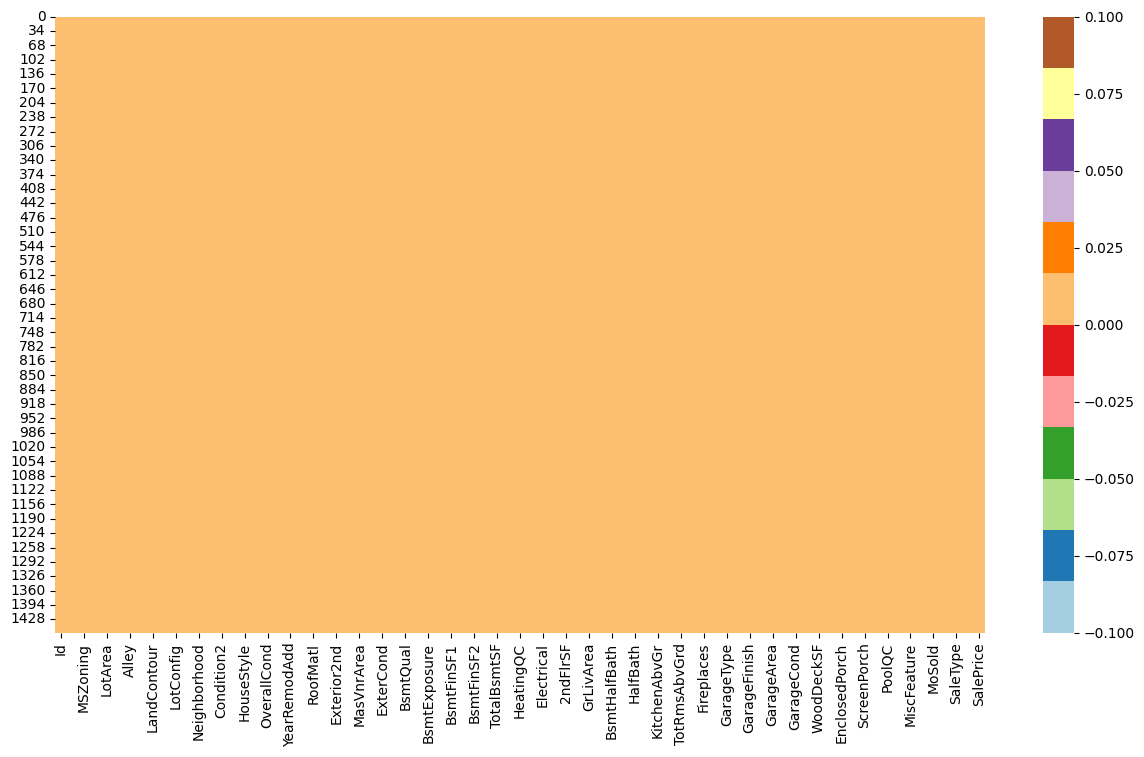

In [ ]:
# Visualizing missing values in a dataset

plt.figure(figsize=(15,8))
sns.heatmap(d_train.isna(),cmap='Paired')

**So we cleaned our dataset with zero null vales left**

In [ ]:
d_train.shape

(1460, 81)

In [ ]:
# Defining how required variables correlate to our target variable

corr = d_train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice.head(10)

<ipython-input-23-e1dea4a900bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d_train.corr()


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

# Data Visualization

**We want to visualize top correlated columns with SalePrice**

<Axes: title={'center': '1stFlrSF'}, xlabel='1stFlrSF', ylabel='SalePrice'>

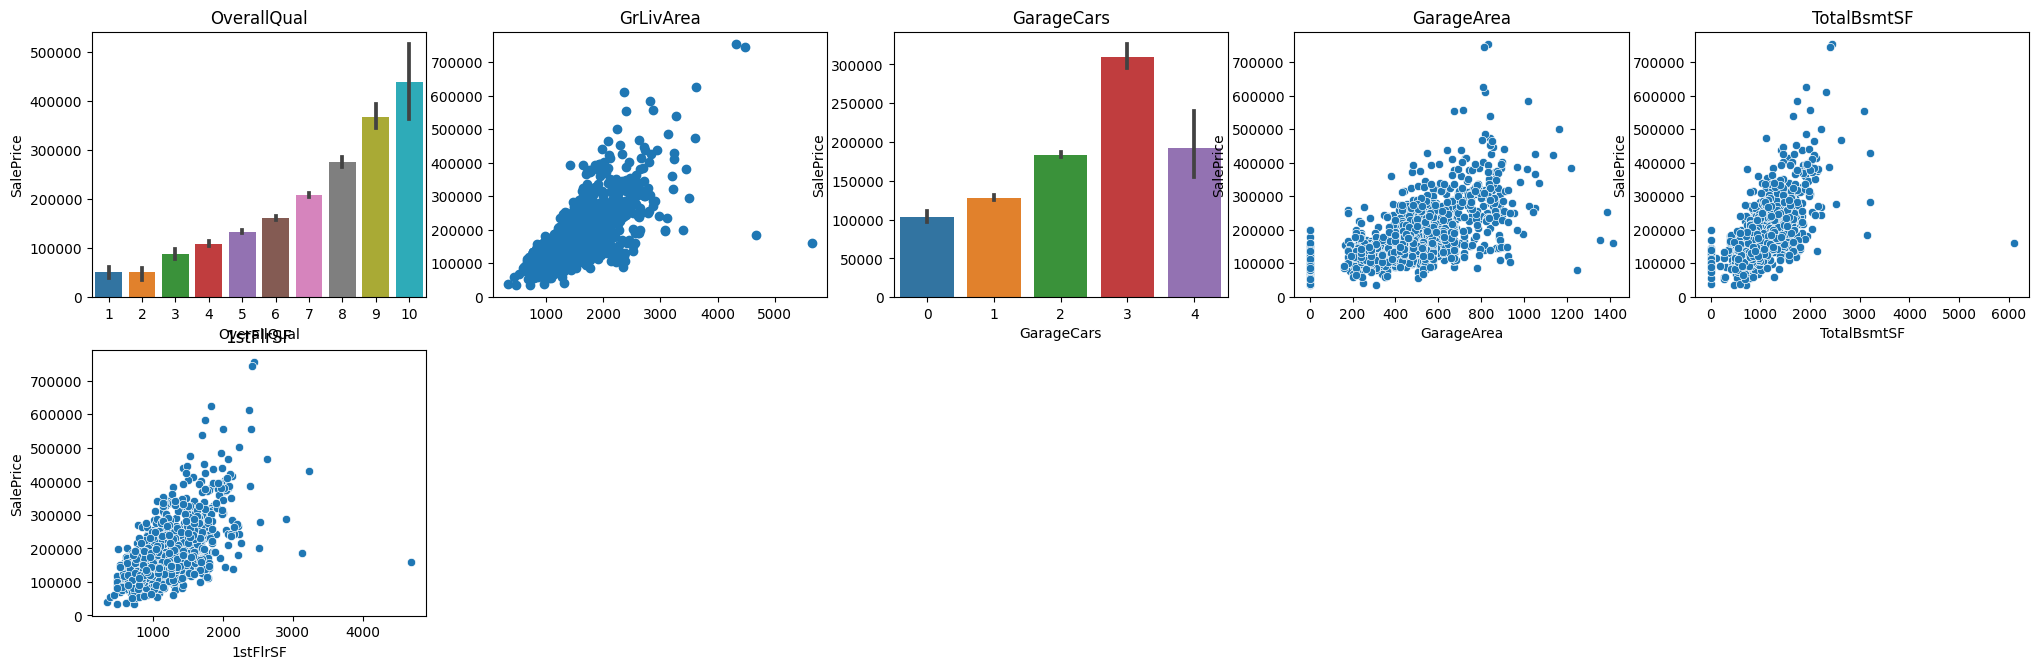

In [ ]:
plt.figure(figsize=(25,20))

plt.subplot(5,5,1)
plt.title('OverallQual')
sns.barplot(x='OverallQual', y='SalePrice', data=d_train)

plt.subplot(5,5,2)
plt.title('GrLivArea')
plt.scatter(x='GrLivArea', y='SalePrice', data=d_train)

plt.subplot(5,5,3)
plt.title('GarageCars')
sns.barplot(x='GarageCars', y='SalePrice', data=d_train)

plt.subplot(5,5,4)
plt.title('GarageArea')
sns.scatterplot(x='GarageArea', y='SalePrice', data=d_train)

plt.subplot(5,5,5)
plt.title('TotalBsmtSF')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=d_train)

plt.subplot(5,5,6)
plt.title('1stFlrSF')
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=d_train)

# Label Encoding

In [ ]:
label = LabelEncoder()
for i in d_train.columns:
    if d_train[i].dtypes == object:
        d_train[i]= label.fit_transform(d_train[i])

# Selecting the Features

In [ ]:
X = d_train.drop('SalePrice', axis=1)
y = d_train['SalePrice']

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating Model with different functions

In [ ]:
def decision_tree_model(X_train, y_train):
    # First using Decision Tree

    tree = DecisionTreeRegressor(random_state=1)
    tree.fit(X_train, y_train)
    y_prediction_tree = tree.predict(X_test)


    # metrics of decision tree regressor

    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_tree)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_tree)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_tree))

    print('Decision Tree: ', r2_score(y_test,y_prediction_tree))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)

    # Visualizing

    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_tree,cmap='Paired',c='blue')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_tree), max(y_test))
    p2 = min(min(y_prediction_tree), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()


Decision Tree:  0.7661696898489476
Mean Absolute Error: 26753.23287671233
Mean Square Error: 1631689828.3835616
Root Mean Square Error: 40394.180625228204


<ipython-input-28-44559c4e3baf>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_prediction_tree,cmap='Paired',c='blue')


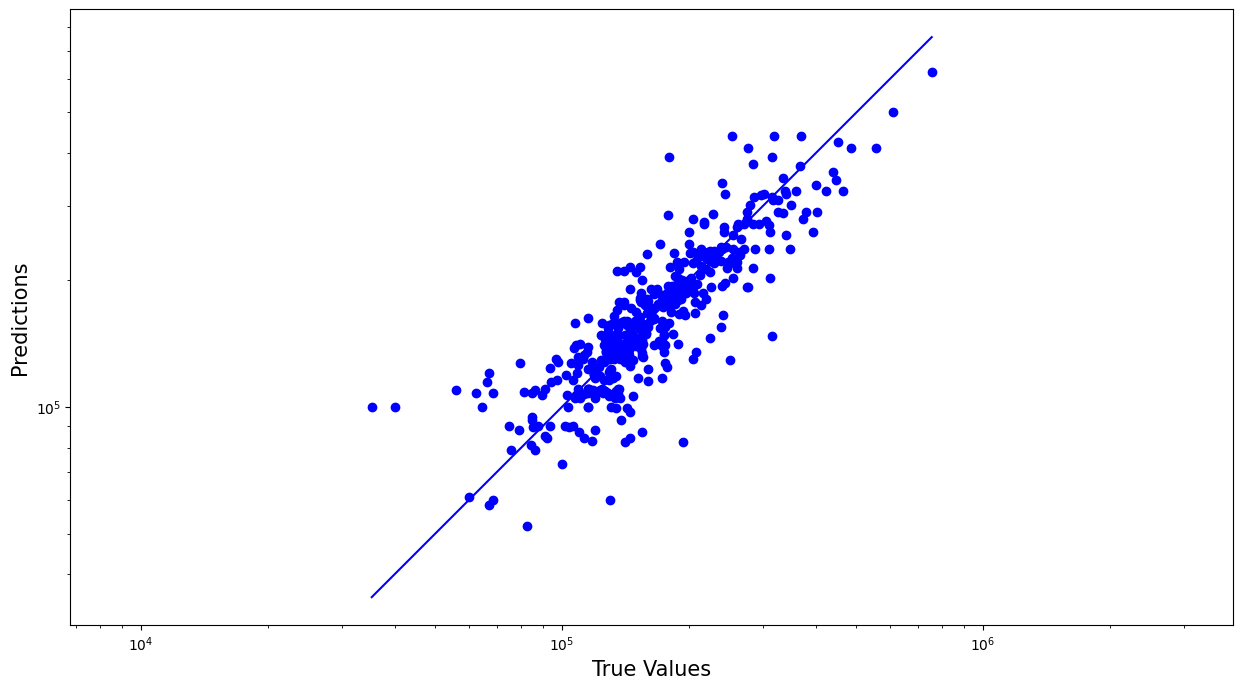

In [ ]:
decision_tree_model(X_train, y_train)

In [ ]:
def rand_forest(X_train, y_train):
    #using RandomForestRegressor

    forest = RandomForestRegressor(n_estimators=100, random_state=0)
    forest.fit(X_train, y_train)
    y_prediction_forest = forest.predict(X_test)

    # metrics of random forest

    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_forest)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_forest)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_forest))

    # Printing

    print('Random Forest Regressor: ', r2_score(y_test,y_prediction_forest))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)

    # Visualizing

    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_forest,cmap='Paired',c='brown')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_forest), max(y_test))
    p2 = min(min(y_prediction_forest), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()




Random Forest Regressor:  0.8938945468323075
Mean Absolute Error: 17137.108196347035
Mean Square Error: 740413800.7511126
Root Mean Square Error: 27210.54576356587


<ipython-input-30-5f7ba29bec36>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_prediction_forest,cmap='Paired',c='brown')


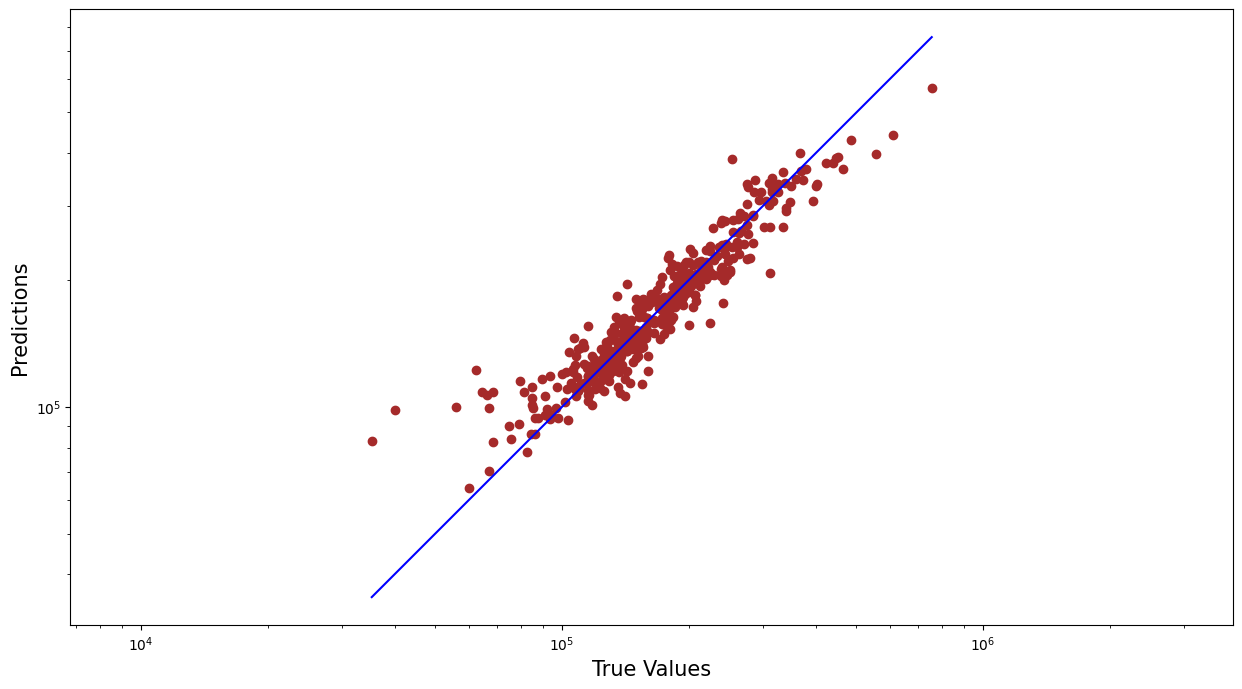

In [ ]:
rand_forest(X_train, y_train)

In [ ]:
def knnreg(X_train, y_train):
    # using knn Regressor

    knn = neighbors.KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_prediction_knn = knn.predict(X_test)

    # metrics of knn regressor

    MeanAbErr_tree = mean_absolute_error(y_test, y_prediction_knn)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_prediction_knn)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_prediction_knn))

    # Printing

    print('Knn neighbors Regressor: ', r2_score(y_test,y_prediction_knn))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)

    # Visualizing

    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_prediction_knn,cmap='Paired',c='green')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_prediction_knn), max(y_test))
    p2 = min(min(y_prediction_knn), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()




Knn neighbors Regressor:  0.6748692476534716
Mean Absolute Error: 29896.73652968037
Mean Square Error: 2268792874.4388127
Root Mean Square Error: 47631.847270904924


<ipython-input-32-a4a51ce32970>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_prediction_knn,cmap='Paired',c='green')


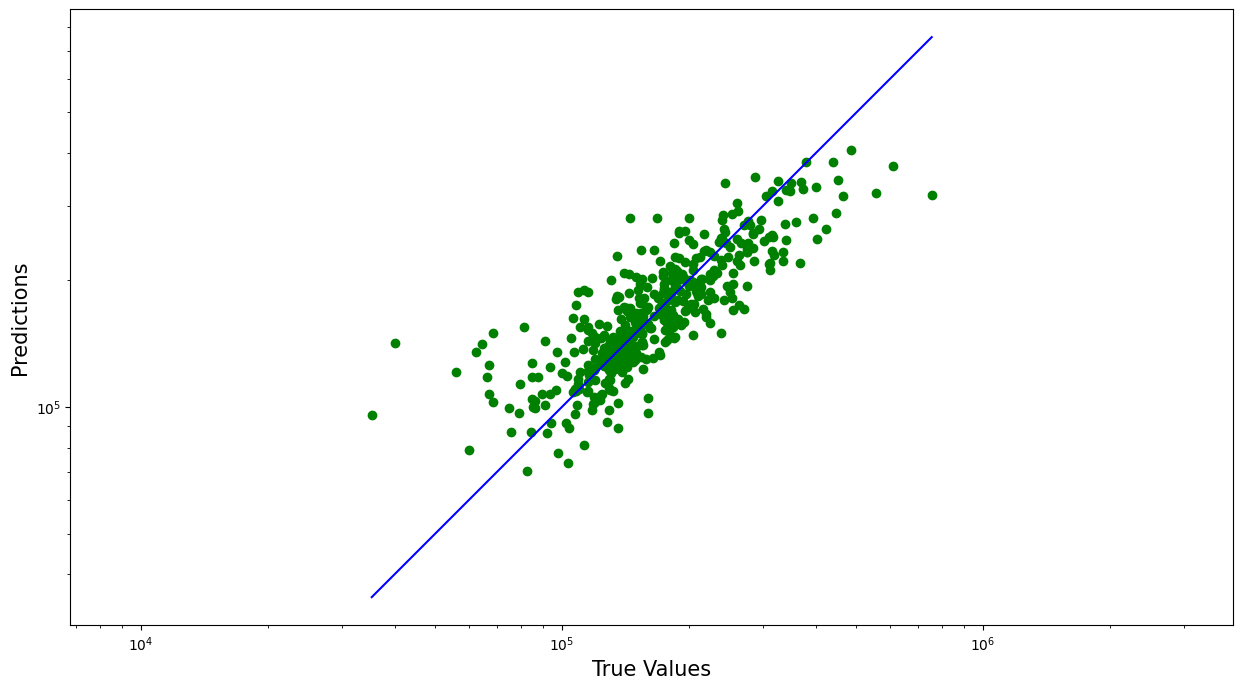

In [ ]:
knnreg(X_train, y_train)

In [ ]:
def xboost(X_train, y_train):
    # using xgboost regressor

    xgboost = XGBRegressor()
    xgboost.fit(X_train, y_train)
    y_pred_xgboost = xgboost.predict(X_test)

    # metrics of xgboost regressor

    MeanAbErr_tree = mean_absolute_error(y_test, y_pred_xgboost)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_xgboost)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))

    # Printing

    print('XGBoost Regressor: ', r2_score(y_test,y_pred_xgboost))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)

    # Visualizing

    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_pred_xgboost,cmap='Paired',c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred_xgboost), max(y_test))
    p2 = min(min(y_pred_xgboost), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()



XGBoost Regressor:  0.908909238086754
Mean Absolute Error: 16700.602739726026
Mean Square Error: 635639877.3860298
Root Mean Square Error: 25211.899519592527


<ipython-input-34-602bbfaa473d>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_xgboost,cmap='Paired',c='crimson')


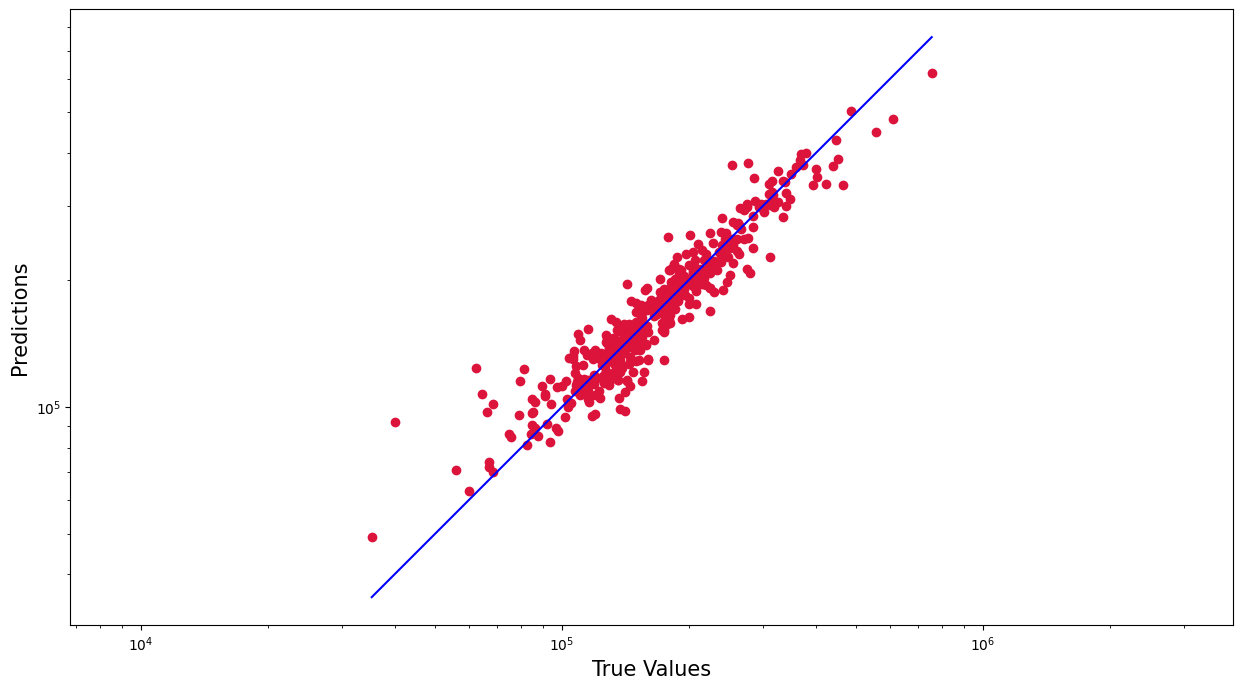

In [ ]:
xboost(X_train, y_train)

In [ ]:
def linear_reg(X_train, y_train):
    # using Linear regressor

    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred_linear = lin.predict(X_test)

    # metrics of linear regressor

    MeanAbErr_tree = mean_absolute_error(y_test, y_pred_linear)
    MeanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_linear)
    RootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))

    # Printing

    print('Linear Regressor: ', r2_score(y_test,y_pred_linear))
    print('Mean Absolute Error:', MeanAbErr_tree)
    print('Mean Square Error:', MeanSqErr_tree)
    print('Root Mean Square Error:', RootMeanSqErr_tree)

    # Visualizing

    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_pred_linear,cmap='Paired')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred_linear), max(y_test))
    p2 = min(min(y_pred_linear), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()



Linear Regressor:  0.844593252282256
Mean Absolute Error: 21821.475413174376
Mean Square Error: 1084442856.6570582
Root Mean Square Error: 32930.87998607171


<ipython-input-36-02267d19b7cd>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test,y_pred_linear,cmap='Paired')


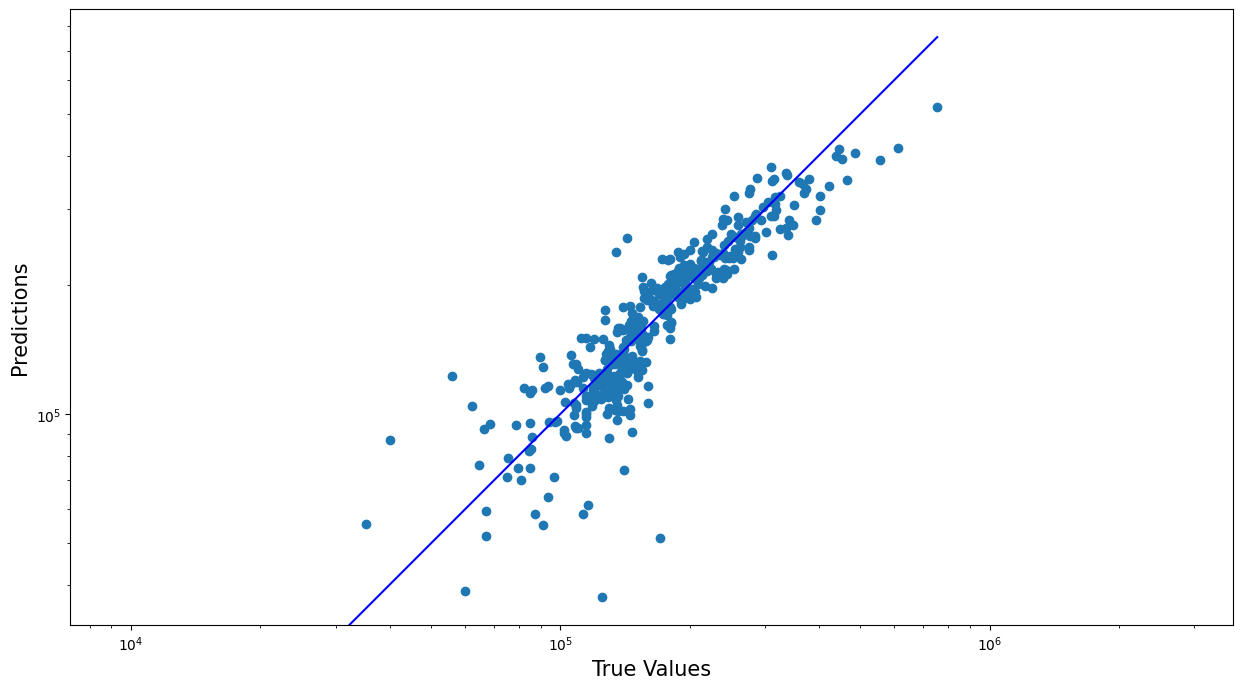

In [ ]:
linear_reg(X_train, y_train)

**Now It is time to implement our model into d_test**

In [ ]:
d_test.shape

(1459, 80)

In [ ]:
# Im goona use the same method with d_test to fill missing values

In [ ]:
d_test.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [ ]:
d_test['PoolQC']= d_test['PoolQC'].fillna('None')
d_test['MiscFeature']= d_test['MiscFeature'].fillna('None')
d_test['Alley']= d_test['Alley'].fillna('None')
d_test['Fence']= d_test['Fence'].fillna('None')
d_test['FireplaceQu']= d_test['FireplaceQu'].fillna('None')

In [ ]:
# Impute "LotFrotage" column with its mean values

d_test['LotFrontage'] = d_test['LotFrontage'].fillna(d_test['LotFrontage'].mean())

In [ ]:
# Filling these columns with zero values

d_test['GarageYrBlt']= d_test['GarageYrBlt'].fillna(0)
d_test['MasVnrArea']= d_test['MasVnrArea'].fillna(0)

In [ ]:
# Filling the missing data with most_frequent values

d_test['GarageCond'] = d_test['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_test['GarageType'] = d_test['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_test['GarageFinish'] = d_test['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_test['GarageQual'] = d_test['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_test['BsmtFinType2'] = d_test['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_test['BsmtExposure'] = d_test['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_test['BsmtQual'] = d_test['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_test['BsmtCond'] = d_test['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_test['BsmtFinType1'] = d_test['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_test['MasVnrType'] = d_test['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_test['Electrical'] = d_test['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())
d_test['MSZoning'] = d_test['MSZoning'].fillna(d_train['MSZoning'].value_counts().idxmax())
d_test['BsmtFullBath'] = d_test['BsmtFullBath'].fillna(d_train['BsmtFullBath'].value_counts().idxmax())
d_test['BsmtHalfBath'] = d_test['BsmtHalfBath'].fillna(d_train['BsmtHalfBath'].value_counts().idxmax())
d_test['Functional'] = d_test['Functional'].fillna(d_train['Functional'].value_counts().idxmax())
d_test['Utilities'] = d_test['Utilities'].fillna(d_train['Utilities'].value_counts().idxmax())
d_test['Exterior2nd'] = d_test['Exterior2nd'].fillna(d_train['Exterior2nd'].value_counts().idxmax())
d_test['SaleType'] = d_test['SaleType'].fillna(d_train['SaleType'].value_counts().idxmax())
d_test['Exterior1st'] = d_test['Exterior1st'].fillna(d_train['Exterior1st'].value_counts().idxmax())
d_test['KitchenQual'] = d_test['KitchenQual'].fillna(d_train['KitchenQual'].value_counts().idxmax())

In [ ]:
d_test['BsmtFinSF2'] = d_test['BsmtFinSF2'].fillna(d_train['BsmtFinSF2'].mean())
d_test['GarageArea'] = d_test['GarageArea'].fillna(d_train['GarageArea'].mean())
d_test['BsmtFinSF1'] = d_test['BsmtFinSF1'].fillna(d_train['BsmtFinSF1'].mean())
d_test['GarageCars'] = d_test['GarageCars'].fillna(d_train['GarageCars'].mean())
d_test['TotalBsmtSF'] = d_test['TotalBsmtSF'].fillna(d_train['TotalBsmtSF'].mean())
d_test['BsmtUnfSF'] = d_test['BsmtUnfSF'].fillna(d_train['BsmtUnfSF'].mean())


In [ ]:
d_test.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
dtype: int64

In [ ]:
label = LabelEncoder()
for x in d_test.columns:
    if d_test[x].dtypes == object:
        d_test[x]= label.fit_transform(d_test[x].astype(str))

**XGBoost and Random Forest Regressor are the best predictors with lowest errors.
But Im going to take XGBoost model for the submission ****

In [ ]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(d_test)
y_pred_xgboost.shape

(1459,)

In [ ]:
y_pred_xgboost

array([128501.37, 152014.55, 196839.72, ..., 165847.95, 108159.75,
       213017.86], dtype=float32)

In [ ]:
id_test = d_test['Id']
d_test = pd.DataFrame(d_test, columns=['ID'])

In [ ]:
prediction = pd.DataFrame(y_pred_xgboost, columns=["SalePrice"])


In [ ]:
output = pd.concat([id_test, prediction],axis=1)

In [ ]:
output

,Id,SalePrice
0,1461,128501.367188
1,1462,152014.546875
2,1463,196839.718750
3,1464,192793.265625
4,1465,202873.828125
...,...,...
1454,2915,72614.914062
1455,2916,80569.882812
1456,2917,165847.953125
1457,2918,108159.750000


# Submission

In [55]:
output.to_csv('submission.csv', index=False)